<h1 align=center><font size = 5>Data Visualization Using Python Assessment</font></h1>

<h2 align=center><font size = 4>Percentage of Respondents' Interest  Data Science Areas</font></h2>

<h3>Importing Libraries

In [1]:
import numpy as np
import pandas as pd

<h3> Fetching Dataframe

In [2]:
path = 'https://cocl.us/datascience_survey_data'

df_topics = pd.read_csv(path)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


<h3>Cleaning data and setting Index

In [3]:
#Rename Column and Set as Index
df_topics.rename(columns={'Unnamed: 0':'Data Science Topics'}, inplace=True)
df_topics.set_index('Data Science Topics', inplace=True)
df_topics.index.name = None
df_topics.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


<h3> Sort the dataframe in descending order of "Very interested" and Convert the numbers into Percentages

In [4]:
#Sort the Dataframe
df_topics.sort_values(by='Very interested', ascending=False, axis=0, inplace=True)
#df_topics.dtypes

#Convert Numbers into Percentages
df_topics = df_topics.div(2233).multiply(100).round(2)
df_topics.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


<h3>Importing Matplotlib

In [5]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

<h3> Defining "add_value_lables" Function to Add Bar Labels

In [8]:
#Function Definition to add labels
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

<h3>Chart Styling:</h3>
1. Figure Size of (20, 8).
<br>2. Bar width of "0.8".
<br>3. Color #5cb85c for the "Very interested" bars, #5bc0de for the "Somewhat interested" bars and #d9534f for the "Not interested" bars.
<br>4. Font Size 14 for the bar labels, percentages and legend.
<br>5. Font Size 16 for the title.
<br>6. Display the percentages above the bars and remove the left, top and right borders.

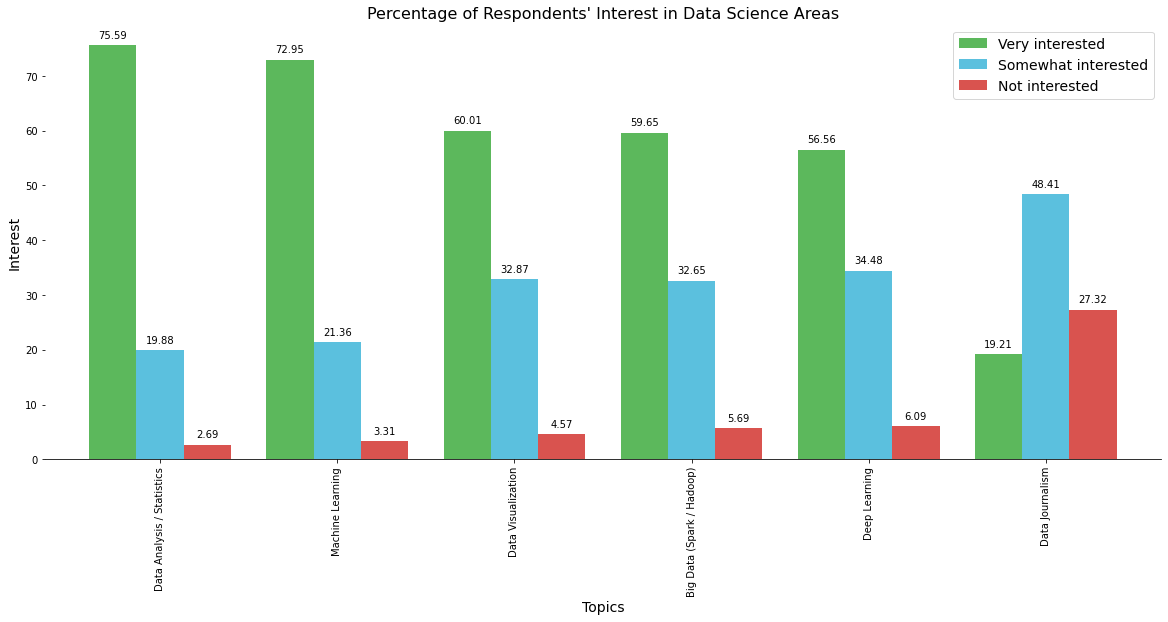

In [9]:
ax = df_topics.plot(kind='bar', figsize=(20, 8), width=0.8,color=['#5cb85c', '#5bc0de', '#d9534f'])
#Function call to add labels
add_value_labels(ax)
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas',fontsize=16)
ax.set_ylabel('Interest', size=14)
ax.set_xlabel('Topics', size=14)
ax.legend(fontsize=14)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)